# 이진분류 실습 : 이직 예측

* 회사 인사팀에서는 여러분들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터 로딩

In [3]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_train_validation.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,20,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	| Single, Married, Divorced		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 2.데이터 전처리

### (1) 데이터 정리

In [4]:
target = 'Attrition'

In [5]:
# 불필요한 변수 제거
data.drop('EmployeeNumber', axis = 1, inplace = True)

In [6]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [7]:
dum_cols = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
            'JobRole', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
            'StockOptionLevel','WorkLifeBalance' ]

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7,11691,0,11,14,3,13,9,7,...,False,False,False,True,False,False,False,False,False,True
1,35,18,9362,2,11,10,2,2,2,2,...,False,False,True,False,False,False,False,False,True,False
2,42,6,13348,9,13,18,3,13,7,7,...,False,True,False,False,True,False,False,False,False,True
3,46,2,17048,8,23,28,2,26,15,9,...,False,False,False,False,False,False,False,False,True,False
4,39,20,4127,2,18,7,6,2,1,2,...,False,False,False,True,True,False,False,False,True,False


### (3) 데이터 분할
* train_test_split :
    * test_size : 0.# - 비율로 분할, 1보다 큰 자연수 - 갯수로 분할
    * train_size로 지정도 가능.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 200, stratify=y, random_state = 2022)

In [ ]:
y_train.value_counts()

Attrition
0    882
1    168
Name: count, dtype: int64

In [ ]:
y_val.value_counts()

Attrition
0    168
1     32
Name: count, dtype: int64

### (4) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
y_train.value_counts() / len(y_train)

Attrition
0    0.84
1    0.16
Name: count, dtype: float64

In [ ]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE

# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print('Original dataset shape %s' % Counter(y))


# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


## 4.모델링

### (1) 모델1
* 다양한 구조의 모델 2개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [ ]:
n = x_train.shape[1]
model = Sequential([Dense(4, input_shape=(n,), activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1, activation='sigmoid')]) # 이것만 있으면 로지스틱 회귀
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 4)                 216       
                                                                 
 dense_66 (Dense)            (None, 2)                 10        
                                                                 
 dense_67 (Dense)            (None, 1)                 3         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
27/27 [==============================] - 1s 9ms/step - loss: 0.6888 - val_loss: 0.6840
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6800 - val_loss: 0.6752
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6715 - val_loss: 0.6668
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6632 - val_loss: 0.6586
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6552 - val_loss: 0.6506
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6475 - val_loss: 0.6431
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6400 - val_loss: 0.6354
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6327 - val_loss: 0.6283
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6257 - val_loss: 0.6212
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6189 - val_loss: 0.6142
Epoch 11/50
27/27 [

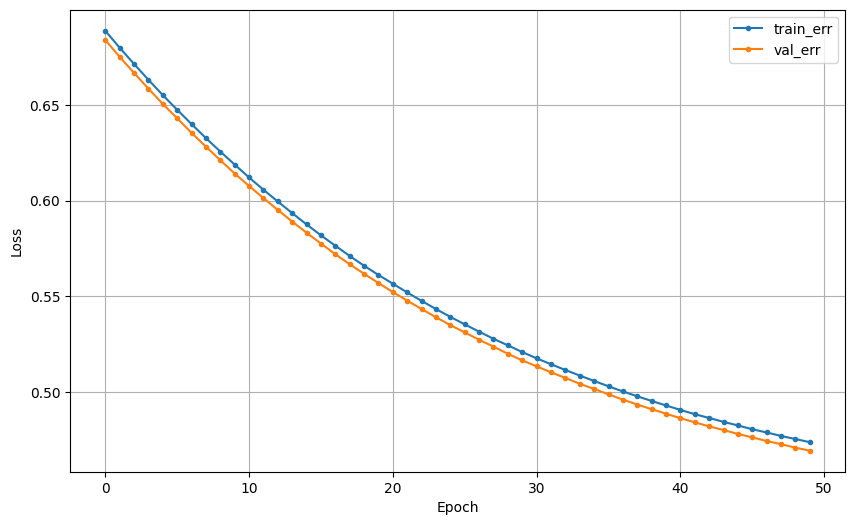

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
hist = model.fit(x_train, y_train, epochs=50, validation_split=.2).history
dl_history_plot(hist)

In [ ]:
# hidden 노드가 복잡하지 않을때 성능 좋을때가 있다!

In [ ]:
pred = model.predict(x_val)
pred = np.where(pred>=.5, 1, 0)
pred[:5]

7/7 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[168   0]
 [ 32   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       168
           1       0.00      0.00      0.00        32

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
